In [2]:
import cirq

In [3]:
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler

In [4]:
access_token = '2633b2d14dae4d9da7c9df2503857334'

In [5]:
device, qubits = get_aqt_device(2)
print(device)

0───1


In [6]:
circuit = cirq.Circuit(device=device)
circuit.append([cirq.H(qubits[0])])
circuit.append([cirq.H(qubits[1])])
# circuit.append([cirq.CNOT(qubits[1], qubits[0])])
device.validate_circuit(circuit)
print(circuit, qubits)

0: ───Rx(π)───Ry(-0.5π)───

1: ───Rx(π)───Ry(-0.5π)─── [cirq.LineQubit(0), cirq.LineQubit(1)]


In [14]:
url = 'https://gateway.aqt.eu/marmot/sim/'
aqt_sampler = AQTSampler(url, access_token=access_token)
aqt_sweep = aqt_sampler.run(circuit, repetitions=120)
print(aqt_sweep)

m=101100111110111100111110110111011101011101111100101001011111001111111110111101101111111000111111100011101101011111101111, 000000100110001100110110000110011001001101111100101001010101000110101110110101101001111000111111000000000001010010101101


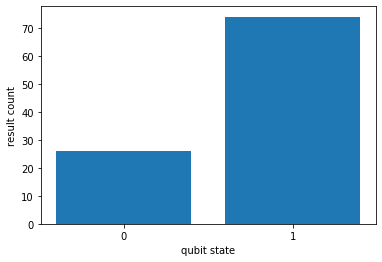

array([26., 74.])

In [10]:
cirq.plot_state_histogram(aqt_sweep)